In [2]:
# Carga de datos #
import pandas as pd
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os

linkname = 'C:\\Users\\Haine\\OneDrive\\Escritorio\\Proyecto_2\\Data\\bank_cleaned.csv'
df = pd.read_csv(linkname, sep=';')


In [3]:
df.head()


,",age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary"
0,"0,58,management,married,tertiary,no,2143,yes,n..."
1,"1,44,technician,single,secondary,no,29,yes,no,..."
2,"2,33,entrepreneur,married,secondary,no,2,yes,y..."
3,"5,35,management,married,tertiary,no,231,yes,no..."
4,"6,28,management,single,tertiary,no,447,yes,yes..."


In [4]:

# Carga del dataset original
df = pd.read_csv('C:\\Users\\Haine\\OneDrive\\Escritorio\\Proyecto_2\\Data\\bank_cleaned.csv')

# Convertir duración de segundos a minutos
df['duration'] = df['duration'].apply(lambda n: n / 60).round(2)


In [5]:
print(df.columns)


Index(['Unnamed: 0', 'age', 'job', 'marital', 'education', 'default',
       'balance', 'housing', 'loan', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'response', 'response_binary'],
      dtype='object')


In [6]:
# Asegúrate de que la columna 'y' exista
if 'y' in df.columns:
    df.rename(columns={'y': 'response'}, inplace=True)


In [7]:
import pandas as pd

df.head()
df.info()

 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40841 entries, 0 to 40840
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       40841 non-null  int64  
 1   age              40841 non-null  int64  
 2   job              40841 non-null  object 
 3   marital          40841 non-null  object 
 4   education        40841 non-null  object 
 5   default          40841 non-null  object 
 6   balance          40841 non-null  int64  
 7   housing          40841 non-null  object 
 8   loan             40841 non-null  object 
 9   day              40841 non-null  int64  
 10  month            40841 non-null  object 
 11  duration         40841 non-null  float64
 12  campaign         40841 non-null  int64  
 13  pdays            40841 non-null  int64  
 14  previous         40841 non-null  int64  
 15  poutcome         40841 non-null  object 
 16  response         40841 non-null  object 
 17  response_bin

In [8]:
df.describe()

,Unnamed: 0,age,balance,day,duration,campaign,pdays,previous,response_binary
count,40841.000000,40841.000000,40841.000000,40841.000000,40841.000000,40841.000000,40841.000000,40841.000000,40841.000000
mean,22006.477657,40.790676,1073.981807,15.863666,0.071798,2.774149,32.248304,0.436791,0.113587
std,12919.797651,10.475473,1712.556186,8.313608,0.071838,3.104177,90.738402,1.572342,0.317313
min,0.000000,18.000000,-6847.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,10888.000000,33.000000,64.000000,8.000000,0.030000,1.000000,-1.000000,0.000000,0.000000
50%,21652.000000,39.000000,421.000000,16.000000,0.050000,2.000000,-1.000000,0.000000,0.000000
75%,33102.000000,48.000000,1333.000000,21.000000,0.090000,3.000000,-1.000000,0.000000,0.000000
max,45209.000000,95.000000,10443.000000,31.000000,1.370000,58.000000,871.000000,55.000000,1.000000


In [8]:
# 8. Convertir meses a número
month_map = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4,
    'may': 5, 'jun': 6, 'jul': 7, 'aug': 8,
    'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}
df['month_int'] = df['month'].map(month_map)

In [9]:
# 11. Resultado final
print("Dataset limpio con forma:", df.shape)
df.head()

Dataset limpio con forma: (40841, 19)


,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary,month_int
0,0,58,management,married,tertiary,no,2143,yes,no,5,may,0.07,1,-1,0,unknown,no,0,5
1,1,44,technician,single,secondary,no,29,yes,no,5,may,0.04,1,-1,0,unknown,no,0,5
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,0.02,1,-1,0,unknown,no,0,5
3,5,35,management,married,tertiary,no,231,yes,no,5,may,0.04,1,-1,0,unknown,no,0,5
4,6,28,management,single,tertiary,no,447,yes,yes,5,may,0.06,1,-1,0,unknown,no,0,5


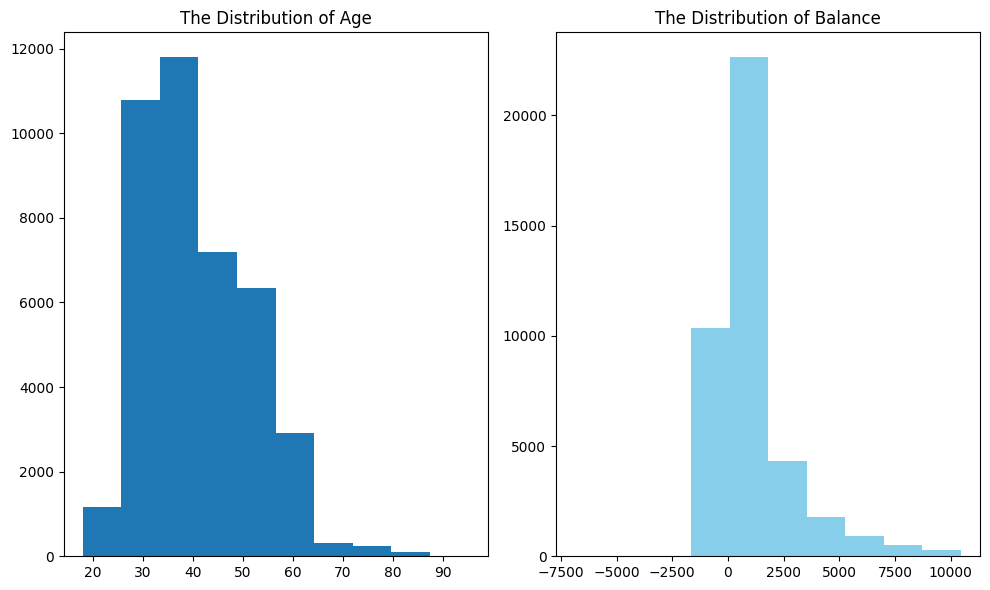

In [10]:
dist_age_balance = plt.figure(figsize=(10,6))
ra1 = dist_age_balance.add_subplot(1,2,1) 
ra2 = dist_age_balance.add_subplot(1,2,2)

ra1.hist(df['age'])
ra1.set_title('The Distribution of Age')

ra2.hist(df['balance'], color='skyblue')
ra2.set_title('The Distribution of Balance')

plt.tight_layout()
plt.show()


In [11]:
# Análisis: #
#*- Edad: distribución normal con mayoría entre los 30 y 40 años.
#*- Balance: gran dispersión, incluso después de eliminar outliers. Va de -6847 a +10443 euros.

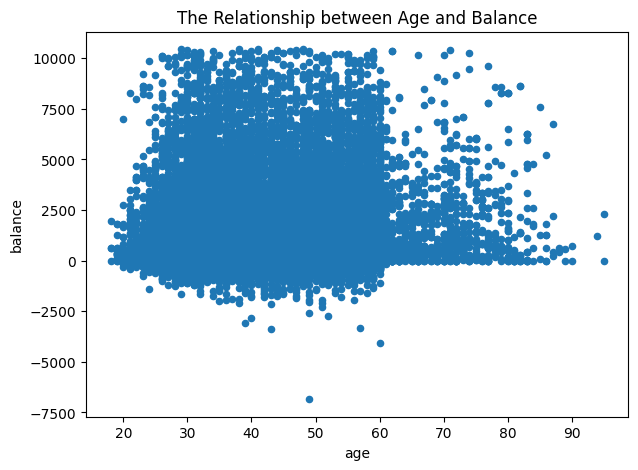

In [12]:
scatter_age_balance = df.plot.scatter('age','balance', figsize=(7,5))
plt.title('The Relationship between Age and Balance')
plt.show()


In [13]:
# Análisis: #
# *- No hay una correlación clara.
# *- Personas mayores de 60 tienden a tener saldos más bajos, posiblemente por jubilación.

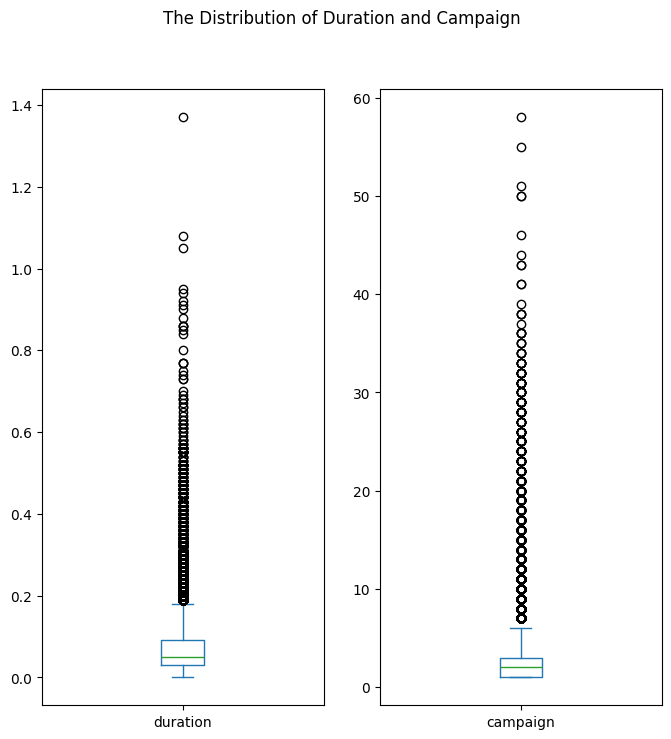

In [13]:
dist_dur_cam = df[['duration','campaign']].plot(kind='box',
                                                      figsize=(8,8),
                                                      subplots=True,
                                                      layout=(1,2),
                                                      sharex=False,
                                                      sharey=False,
                                                      title='The Distribution of Duration and Campaign')
plt.show()


In [15]:
# Análisis: #
# Duración: mediana de 3 minutos, con muchos valores atípicos.
# Campaña: mayoría contactada 1-3 veces, pero algunos hasta 58 (posible señal de insistencia excesiva).

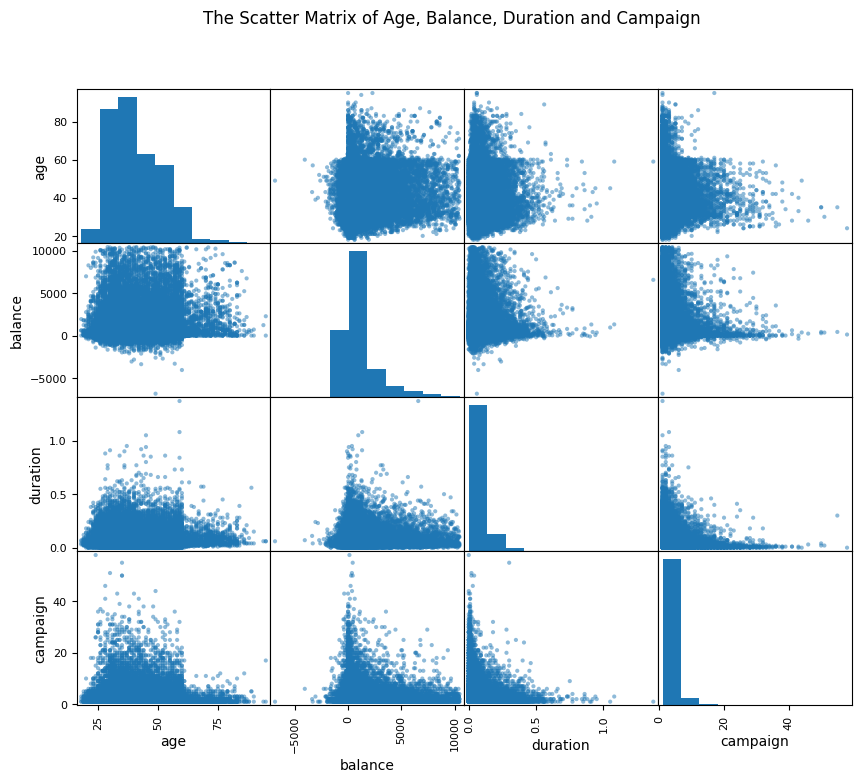

In [14]:
from pandas.plotting import scatter_matrix
matrix = scatter_matrix(df[['age','balance','duration','campaign']], figsize=(10,8))
plt.suptitle('The Scatter Matrix of Age, Balance, Duration and Campaign')
plt.show()


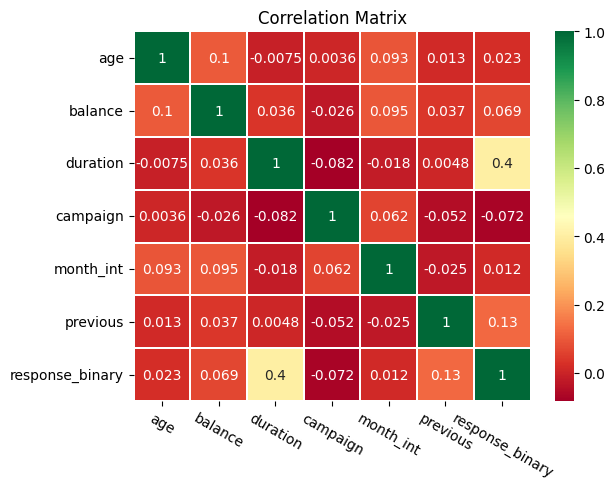

In [15]:
import seaborn as sns

corr_data = df[['age','balance','duration','campaign','month_int','previous','response_binary']]
corr = corr_data.corr()

sns.heatmap(corr, annot=True, cmap='RdYlGn', linewidths=0.2,
            annot_kws={'size':10})
plt.xticks(fontsize=10, rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# Análisis: #
# *- Pocas correlaciones fuertes entre variables numéricas.
# *- 'duration' tiene la mayor correlación positiva con response_binary, lo que sugiere que llamadas más largas aumentan la probabilidad de una respuesta positiva.